
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import random as rd


In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'passenger_count'}>, <Axes: >, <Axes: >]],
      dtype=object)

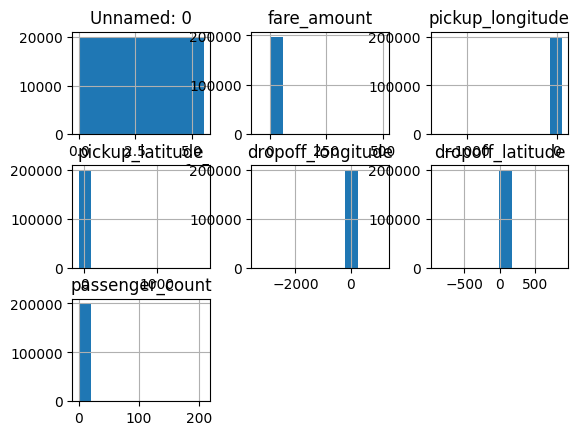

In [5]:
df.hist()

In [6]:
df.corr

<bound method DataFrame.corr of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df1=df
df1.describe()
# Checking Volume of Data at Quartiles

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
df1.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
df1.fare_amount

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [11]:
df1.fare_amount.describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [12]:
# Checking Correlation in DataFrame for individual features
# According to assumption in regression model, inputs fields must not have more inter correlations.
# ield with least correlation with output can be droped.
corr=df1.corr
corr


<bound method DataFrame.corr of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC    

# Identify Outliers

    Visual Methods: Use box plots or scatter plots to visualize fare distribution and identify outliers.
    Statistical Methods: Use Z-scores or the IQR method to quantify outliers.

In [13]:
print(df1.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [14]:
print(df1.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [15]:
df1.columns = df1.columns.str.strip()


In [16]:
import pandas as pd
import numpy as np

# Example of using IQR to detect outliers
Q1 = df1['fare_amount'].quantile(0.25)
Q3 = df1['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df1[(df1['fare_amount'] < (Q1 - 1.5 * IQR)) | (df1['fare_amount'] > (Q3 + 1.5 * IQR))]


In [17]:
print(df1.dtypes)


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


# Check the Correlation

    Use the .corr() method in pandas to check correlation between features.
    Visualize with a heatmap using seaborn.

In [18]:
df1['pickup_datetime'] = pd.to_datetime(df1['pickup_datetime'])


In [19]:
numeric_df = df1.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


<Axes: >

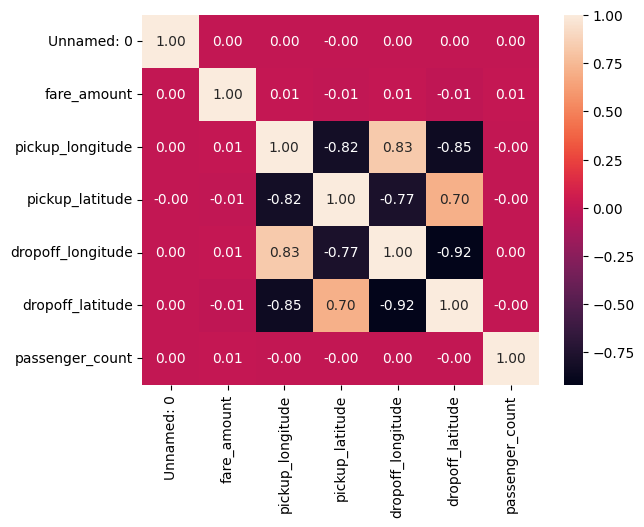

In [20]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f")



 # Implement Linear Regression

    Linear Regression: Use LinearRegression from sklearn.linear_model.
    

In [21]:
print(df1.isna().sum())


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [22]:
# Remove rows with NaNs:
df1 = df1.dropna()

In [23]:
# Inpute missing values: You can fill NaNs with a specific value (like the mean or median).
#df1.fillna(df1.mean(), inplace=True)

In [24]:
print(df1.dtypes)


Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


In [25]:
# imports for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [26]:

# Define input features and target variable
x = df1[['passenger_count']]
y = df1['fare_amount']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the entire feature dataset
x_scaled = scaler.fit_transform(x)

# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=20)



In [27]:
# Checking Dimensions of Data
# x_scaled = x_train + x_test (After Scaling followed by Spliting of DataFrame.)
print(x_scaled.shape)
print(x_train.shape)
print(x_test.shape)

(199999, 1)
(149999, 1)
(50000, 1)


In [28]:
# Creation of Linear Regression Model
from sklearn.linear_model import LinearRegression

# Instantiate LinearRegression Model
lr = LinearRegression()

# Fit method to train model 
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
# Checking Differnt Attributes of Fitted Model
print(lr.predict(x_test))
print(lr.score(x_train, y_train))
print(lr.coef_)
print(lr.intercept_)


[11.31117085 11.31117085 11.31117085 ... 11.31117085 11.38691421
 11.46265757]
0.00011592091617762534
[15.75461901]
11.235427491882477


In [30]:
# Prediction on LinearRegression Model x_test -> y_test
y_pred = lr.predict(x_test)
y_pred

array([11.31117085, 11.31117085, 11.31117085, ..., 11.31117085,
       11.38691421, 11.46265757])

In [31]:
# Evaluation of Model(Evaluation Matrices)
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score

# Evaluate the model
print("Scikit-Learn Model Evaluation:")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}") # r2 value represents accuracy. 
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Scikit-Learn Model Evaluation:
R-squared: 0.0001
Mean Absolute Error (MAE): 6.0138
Mean Squared Error (MSE): 95.8845
Root Mean Squared Error (RMSE): 9.7921


## Implement Random Forest Regression Models
Random Forest Regression: Use RandomForestRegressor from sklearn.ensemble.

In [32]:
# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiation
rfr = RandomForestRegressor() 

# Fit RandomForest Model
rfr.fit(x_test, y_test)

RandomForestRegressor()

In [33]:
# Prediction on RandomForest Model x_test -> y_test
y_pred = rfr.predict(x_test)
y_pred

array([11.26954443, 11.26954443, 11.26954443, ..., 11.26954443,
       11.76548439, 11.23327714])

In [34]:
# Evaluation of Model(Evaluation Matrices)
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score

# Evaluate the model
print("Scikit-Learn Model Evaluation:")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}") # r2 value represents accuracy. 
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

Scikit-Learn Model Evaluation:
R-squared: 0.0006
Mean Absolute Error (MAE): 6.0076
Mean Squared Error (MSE): 95.8331
Root Mean Squared Error (RMSE): 9.7894


In [35]:
'''

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated MSE: {-cv_scores.mean():.2f}")

# Fit the model using statsmodels
X_train_sm = sm.add_constant(X_train)  # Add constant term for intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Summary of the statsmodels results
print("\nStatsmodels Regression Summary:")
print(model_sm.summary())
'''

'\n\n# Cross-validation\ncv_scores = cross_val_score(model, X, y, cv=5, scoring=\'neg_mean_squared_error\')\nprint(f"Cross-Validated MSE: {-cv_scores.mean():.2f}")\n\n# Fit the model using statsmodels\nX_train_sm = sm.add_constant(X_train)  # Add constant term for intercept\nmodel_sm = sm.OLS(y_train, X_train_sm).fit()\n\n# Summary of the statsmodels results\nprint("\nStatsmodels Regression Summary:")\nprint(model_sm.summary())\n'